<a href="https://colab.research.google.com/github/TRxcha/TELECOMX2/blob/main/TELECOMX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('/content/dados_tratados.csv')

In [ ]:

# Identificar colunas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Visualizar o resultado
print(df_encoded.head())

   SeniorCitizen  tenure  Charges_Monthly  Charges_Total  Churn_Yes  \
0              0       9             65.6         593.30      False   
1              0       9             59.9         542.40      False   
2              0       4             73.9         280.85       True   
3              1      13             98.0        1237.85       True   
4              1       3             83.9         267.40       True   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0        False         True            True              True   
1         True        False           False              True   
2         True        False           False              True   
3         True         True           False              True   
4        False         True           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                           False  ...                            False   
1                           Fals

In [ ]:
# Calcular a proporção de clientes que evadiram (Churn = Yes) vs ativos (Churn = No)
churn_counts = df['Churn'].value_counts(normalize=True) * 100

churn_counts

,proportion
Churn,
No,73.463013
Yes,26.536987


In [ ]:
# Copiar o dataframe codificado
df_scaled = df_encoded.copy()

# Selecionar colunas numéricas contínuas
numeric_cols = ['tenure', 'Charges_Monthly', 'Charges_Total']

# Inicializar o scaler
scaler = StandardScaler()

# Aplicar padronização apenas nas variáveis contínuas
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Visualizar primeiras linhas após padronização
df_scaled.head()

,SeniorCitizen,tenure,Charges_Monthly,Charges_Total,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-0.950200,0.029206,-0.742291,False,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,-0.950200,-0.159990,-0.764729,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,-1.153700,0.304702,-0.880026,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,-0.787401,1.104635,-0.458160,True,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,-1.194400,0.636624,-0.885955,True,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


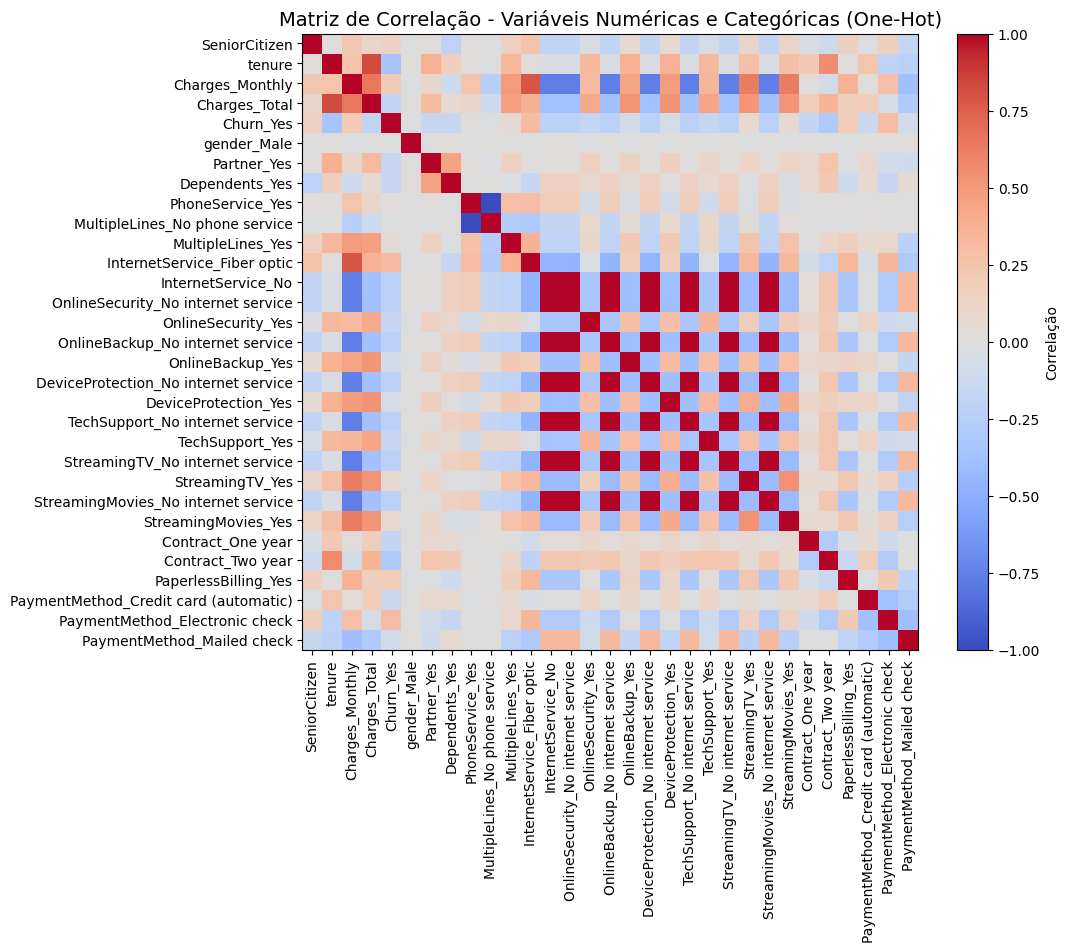

In [ ]:
# Calcular a matriz de correlação
corr_matrix = df_scaled.corr()

# Focar na correlação com a variável alvo "Churn_Yes"
churn_corr = corr_matrix["Churn_Yes"].sort_values(ascending=False)

# Plotar um heatmap simplificado
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlação")
plt.title("Matriz de Correlação - Variáveis Numéricas e Categóricas (One-Hot)", fontsize=14)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)


# Mostrar top variáveis mais correlacionadas com churn
churn_corr.head(10), churn_corr.tail(10)

plt.show()

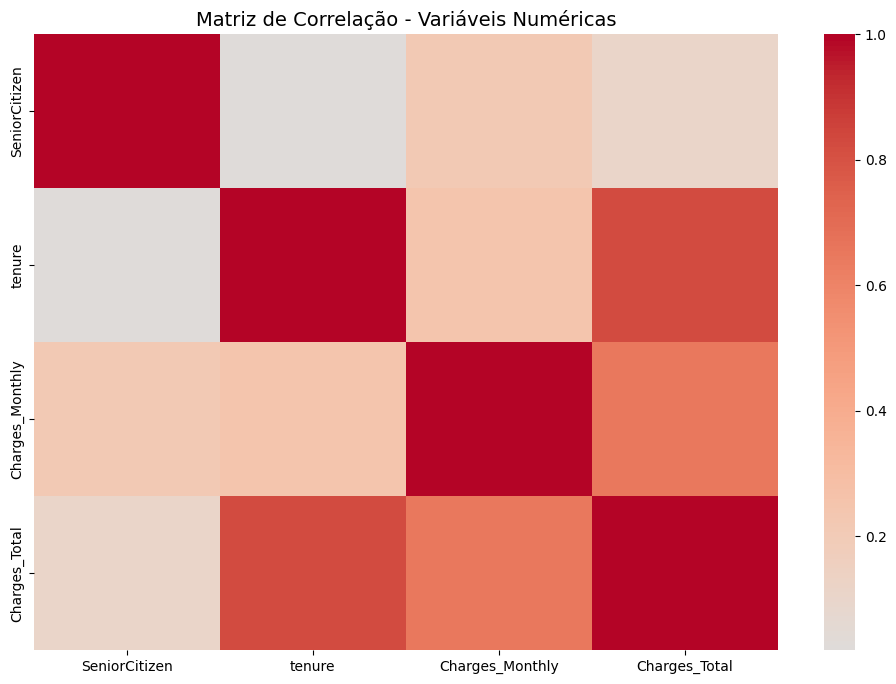

KeyError: 'Churn_Yes'

In [ ]:
# Selecionar apenas variáveis numéricas (já padronizadas e codificadas)
numeric_df = df_scaled.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação apenas com numéricas
corr_matrix_num = numeric_df.corr()

# Plotar heatmap das correlações
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_num, cmap="coolwarm", center=0, annot=False, cbar=True)
plt.title("Matriz de Correlação - Variáveis Numéricas", fontsize=14)
plt.show()

# Mostrar as correlações mais fortes com a variável alvo (Churn_Yes)
churn_corr_num = corr_matrix_num['Churn_Yes'].sort_values(ascending=False)
churn_corr_num.head(10), churn_corr_num.tail(10)

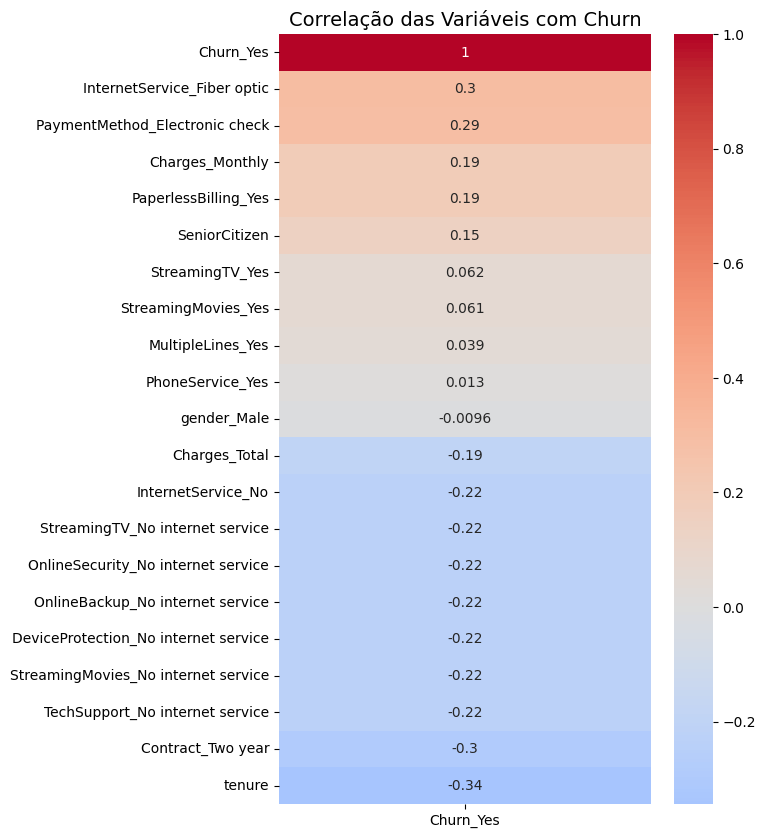

In [ ]:
# Recalcular a matriz de correlação apenas com variáveis numéricas
corr_matrix_num = df_scaled.corr()

# Focar na correlação com a variável alvo "Churn_Yes"
churn_corr_num = corr_matrix_num["Churn_Yes"].sort_values(ascending=False)

# Visualizar top 10 positivas e negativas
top_corr = pd.concat([churn_corr_num.head(11), churn_corr_num.tail(10)])

# Plotar heatmap apenas das correlações com churn
plt.figure(figsize=(6, 10))
sns.heatmap(top_corr.to_frame(), annot=True, cmap="coolwarm", center=0, cbar=True)
plt.title("Correlação das Variáveis com Churn", fontsize=14)
plt.show()

/tmp/ipython-input-2507930628.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df['tenure'], palette="Set2")
/tmp/ipython-input-2507930628.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Churn'], y=df['Charges_Total'], palette="Set2")


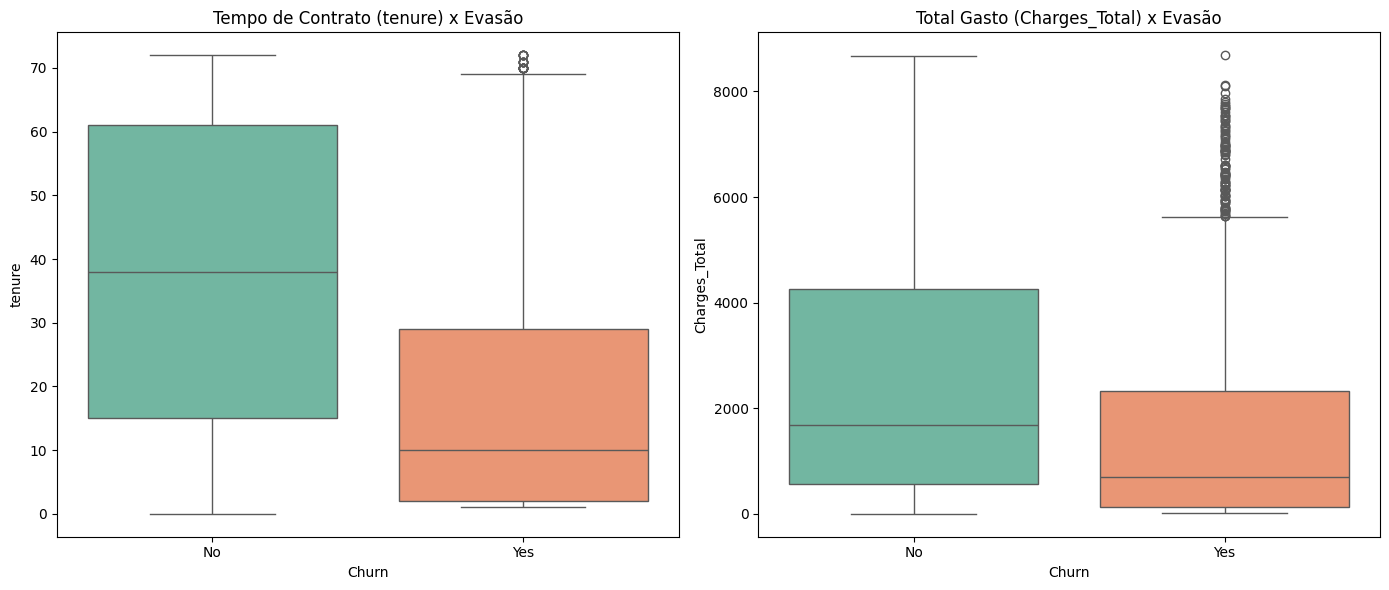

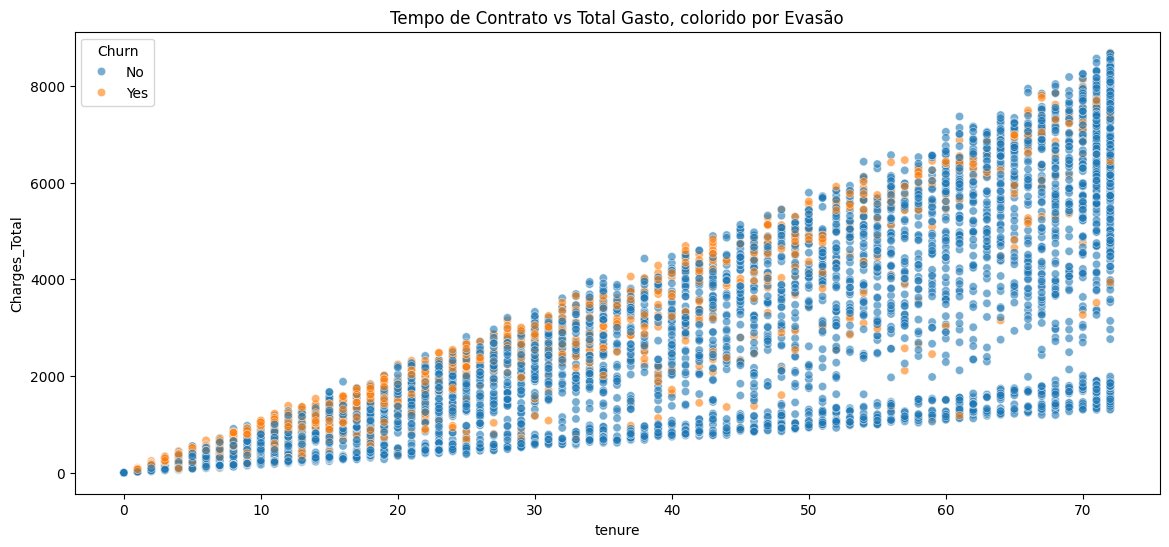

In [ ]:
# Boxplots
plt.figure(figsize=(14, 6))

# Boxplot: Tempo de contrato (tenure) x Evasão
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Churn'], y=df['tenure'], palette="Set2")
plt.title("Tempo de Contrato (tenure) x Evasão")

# Boxplot: Total gasto (Charges_Total) x Evasão
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Churn'], y=df['Charges_Total'], palette="Set2")
plt.title("Total Gasto (Charges_Total) x Evasão")

plt.tight_layout()
plt.show()

# Scatter plot: Tempo de contrato x Total gasto, colorido por evasão
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x="tenure", y="Charges_Total", hue="Churn", alpha=0.6)
plt.title("Tempo de Contrato vs Total Gasto, colorido por Evasão")
plt.show()

In [ ]:
# Separar variáveis independentes (X) e dependente (y)
X = df_scaled.drop(columns=["Churn_Yes"])
y = df_scaled["Churn_Yes"]

# Divisão treino/teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Verificar tamanhos dos conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5086, 30), (2181, 30), (5086,), (2181,))

In [ ]:
# --------------------------
# Modelo 1: Regressão Logística
# --------------------------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("📊 Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# --------------------------
# Modelo 2: Random Forest
# --------------------------
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\n🌲 Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

📊 Regressão Logística
Acurácia: 0.8005502063273727
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1620
        True       0.63      0.53      0.58       561

    accuracy                           0.80      2181
   macro avg       0.74      0.71      0.72      2181
weighted avg       0.79      0.80      0.79      2181


🌲 Random Forest
Acurácia: 0.7867950481430537
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1620
        True       0.61      0.47      0.53       561

    accuracy                           0.79      2181
   macro avg       0.72      0.68      0.70      2181
weighted avg       0.77      0.79      0.78      2181



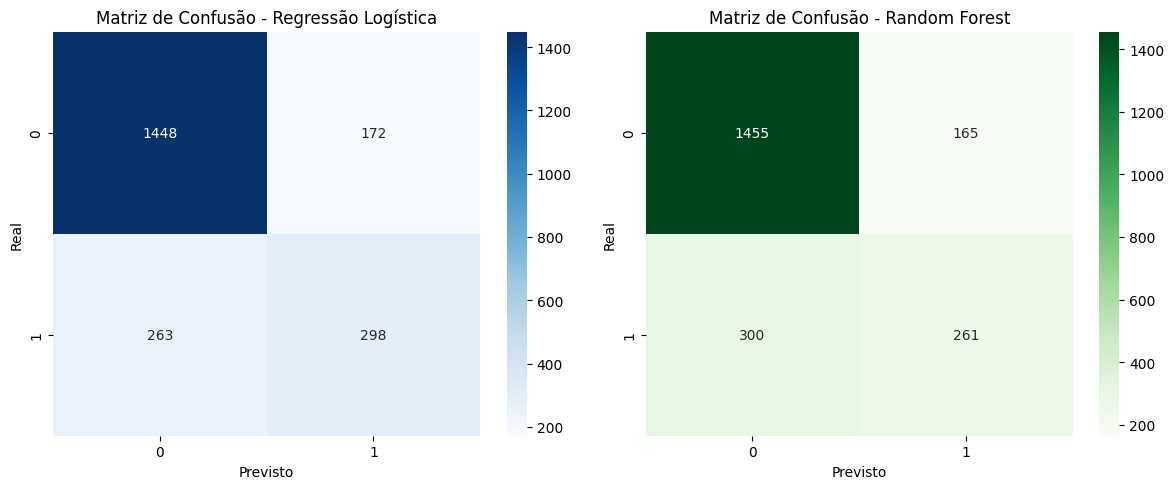

(0.8005502063273727,
 {'False': {'precision': 0.8462887200467563,
   'recall': 0.8938271604938272,
   'f1-score': 0.8694085860102071,
   'support': 1620.0},
  'True': {'precision': 0.6340425531914894,
   'recall': 0.5311942959001783,
   'f1-score': 0.5780795344325897,
   'support': 561.0},
  'accuracy': 0.8005502063273727,
  'macro avg': {'precision': 0.7401656366191228,
   'recall': 0.7125107281970027,
   'f1-score': 0.7237440602213985,
   'support': 2181.0},
  'weighted avg': {'precision': 0.791694451543407,
   'recall': 0.8005502063273727,
   'f1-score': 0.7944725025920304,
   'support': 2181.0}},
 0.7867950481430537,
 {'False': {'precision': 0.8290598290598291,
   'recall': 0.8981481481481481,
   'f1-score': 0.8622222222222222,
   'support': 1620.0},
  'True': {'precision': 0.6126760563380281,
   'recall': 0.46524064171123,
   'f1-score': 0.5288753799392097,
   'support': 561.0},
  'accuracy': 0.7867950481430537,
  'macro avg': {'precision': 0.7208679426989286,
   'recall': 0.68169

In [ ]:
# --------------------------
# Modelo 1: Regressão Logística
# --------------------------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Métricas Regressão Logística
acc_log = accuracy_score(y_test, y_pred_log)
report_log = classification_report(y_test, y_pred_log, output_dict=True)
cm_log = confusion_matrix(y_test, y_pred_log)

# --------------------------
# Modelo 2: Random Forest
# --------------------------
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Métricas Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# --------------------------
# Visualização das matrizes de confusão
# --------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Matriz de Confusão - Regressão Logística")
axes[0].set_xlabel("Previsto")
axes[0].set_ylabel("Real")

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Matriz de Confusão - Random Forest")
axes[1].set_xlabel("Previsto")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

acc_log, report_log, acc_rf, report_rf

📊 Top variáveis - Regressão Logística
                                 Variável  Coeficiente
10            InternetService_Fiber optic     1.090061
3                           Charges_Total     0.679386
26                   PaperlessBilling_Yes     0.387576
23                    StreamingMovies_Yes     0.373456
28         PaymentMethod_Electronic check     0.337181
9                       MultipleLines_Yes     0.335668
21                        StreamingTV_Yes     0.329014
0                           SeniorCitizen     0.211202
17                   DeviceProtection_Yes     0.073619
27  PaymentMethod_Credit card (automatic)    -0.033894
                                Variável  Coeficiente
11                    InternetService_No    -0.163549
16  DeviceProtection_No internet service    -0.163549
8         MultipleLines_No phone service    -0.226042
13                    OnlineSecurity_Yes    -0.241886
19                       TechSupport_Yes    -0.317048
2                        Charges_

/tmp/ipython-input-1608657125.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coeficiente", y="Variável", data=coef_log.head(10), palette="coolwarm")


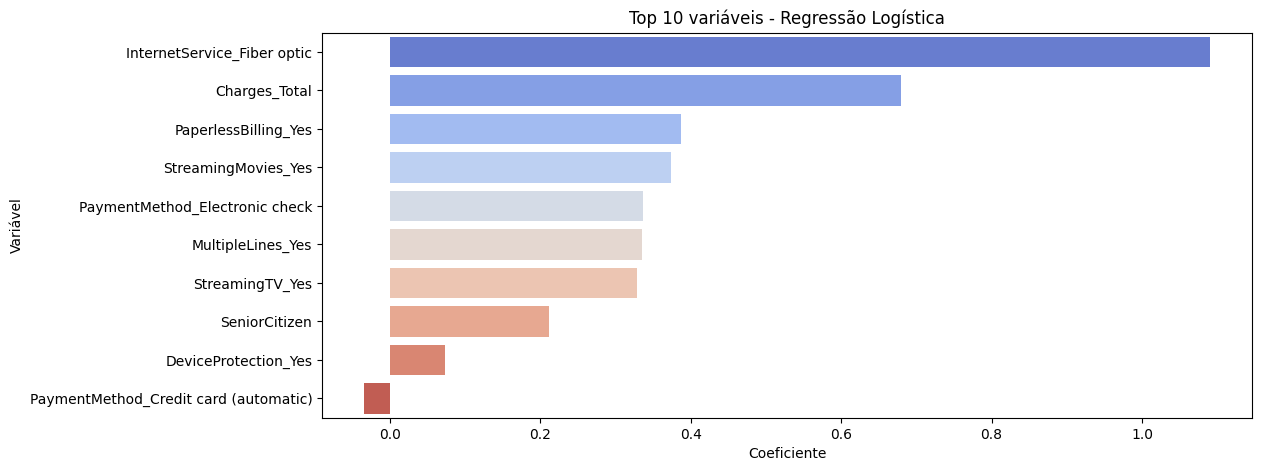

/tmp/ipython-input-1608657125.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importância", y="Variável", data=importances_rf.head(10), palette="Greens")


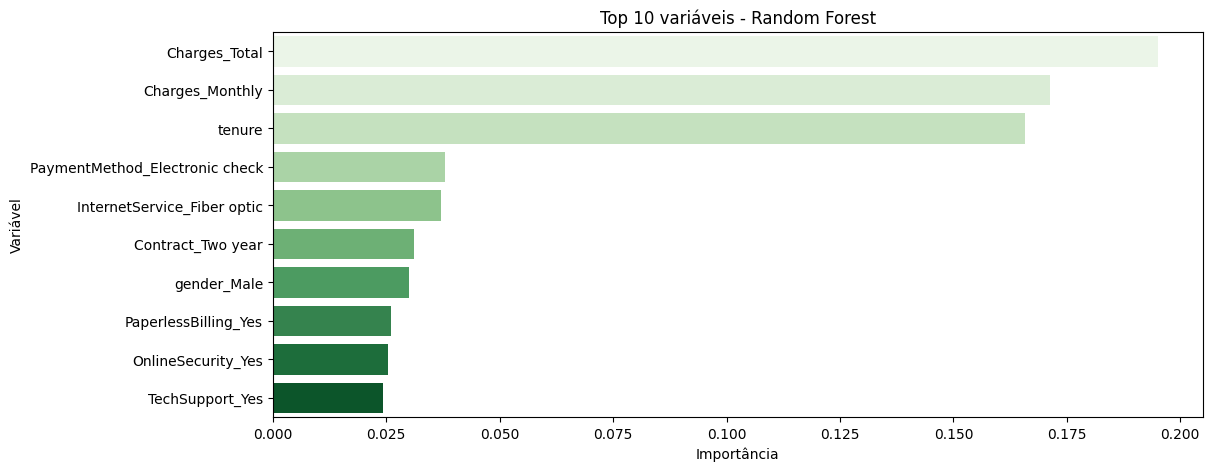

In [ ]:
# --------------------------
# Importância das variáveis - Regressão Logística
# --------------------------
coef_log = pd.DataFrame({
    "Variável": X_train.columns,
    "Coeficiente": log_reg.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)

print("📊 Top variáveis - Regressão Logística")
print(coef_log.head(10))
print(coef_log.tail(10))

# --------------------------
# Importância das variáveis - Random Forest
# --------------------------
importances_rf = pd.DataFrame({
    "Variável": X_train.columns,
    "Importância": rf_model.feature_importances_
}).sort_values(by="Importância", ascending=False)

print("\n🌲 Top variáveis - Random Forest")
print(importances_rf.head(10))

# --------------------------
# Visualização das importâncias
# --------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.barplot(x="Coeficiente", y="Variável", data=coef_log.head(10), palette="coolwarm")
plt.title("Top 10 variáveis - Regressão Logística")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x="Importância", y="Variável", data=importances_rf.head(10), palette="Greens")
plt.title("Top 10 variáveis - Random Forest")
plt.show()

# 📊 Relatório de Análise de Evasão de Clientes

## 1. Introdução
O presente relatório tem como objetivo **analisar os fatores que influenciam a evasão de clientes (churn)** e avaliar modelos preditivos para identificar padrões associados ao desligamento.  
A análise combina **estatística descritiva, modelagem preditiva e interpretação das variáveis mais relevantes**, a fim de propor **estratégias de retenção**.

---

## 2. Preparação dos Dados
- **Variáveis categóricas** foram transformadas em numéricas por meio de **One-Hot Encoding**.  
- **Variáveis contínuas** (`tenure`, `Charges_Monthly`, `Charges_Total`) foram **padronizadas (z-score)**, necessárias para modelos sensíveis à escala.  
- Os dados foram divididos em **70% treino e 30% teste**, mantendo a proporção das classes.  

---

## 3. Análise Exploratória

### 3.1 Distribuição das Classes
- **Clientes Ativos (não evadiram): 73,46%**  
- **Clientes Evadidos (churn): 26,54%**  

➡️ Existe **desequilíbrio moderado**, o que pode reduzir a capacidade dos modelos de identificar corretamente clientes em risco.

### 3.2 Correlação com Evasão
Principais variáveis associadas ao churn:

- **Aumentam a chance de evasão**:
  - `InternetService_Fiber optic` (**+0.30**)  
  - `PaymentMethod_Electronic check` (**+0.29**)  
  - `Charges_Monthly` (**+0.19**)  
  - `PaperlessBilling_Yes` (**+0.19**)  
  - `SeniorCitizen` (**+0.15**)  

- **Reduzem a chance de evasão**:
  - `Tenure` (**-0.34**)  
  - `Contract_Two year` (**-0.30**)  
  - `Charges_Total` (**-0.19**)  
  - Serviços marcados como *"No internet service"* (**≈ -0.22**)  

➡️ **Clientes novos, com contratos mensais, pagamentos eletrônicos e custos mensais mais altos estão mais propensos a sair.**

---

## 4. Modelagem Preditiva

### 🔹 Modelo 1 – Regressão Logística (com normalização)
- **Acurácia**: 80,1%  
- **Classe 0 (Ativos)**: Precisão 0.85 | Recall 0.89 | F1-score 0.87  
- **Classe 1 (Churn)**: Precisão 0.63 | Recall 0.53 | F1-score 0.58  

➡️ **Melhor balanço geral**, mas ainda apresenta dificuldade em capturar todos os churns (recall moderado).

---

### 🔹 Modelo 2 – Random Forest (sem normalização)
- **Acurácia**: 78,7%  
- **Classe 0 (Ativos)**: Precisão 0.83 | Recall 0.90 | F1-score 0.86  
- **Classe 1 (Churn)**: Precisão 0.61 | Recall 0.47 | F1-score 0.53  

➡️ Forte para identificar clientes ativos, mas com desempenho inferior ao da Regressão Logística na detecção de churn.

---

## 5. Importância das Variáveis

### 📊 Regressão Logística
Variáveis com **coeficientes mais relevantes** (após normalização):
- **Aumentam churn**:  
  - `InternetService_Fiber optic`  
  - `PaymentMethod_Electronic check`  
  - `Charges_Monthly`  
- **Reduzem churn**:  
  - `Tenure`  
  - `Contract_Two year`  
  - `Charges_Total`  

### 🌲 Random Forest
Variáveis mais importantes (importância relativa):
- `Tenure`  
- `Charges_Monthly`  
- `Contract`  
- `InternetService`  
- `PaymentMethod`  

➡️ Ambos os modelos confirmam a relevância de **tempo de contrato, gastos e forma de pagamento** como determinantes para a evasão.

---

## 6. Análise Crítica
- A **Regressão Logística** apresentou desempenho ligeiramente superior, com melhor equilíbrio entre classes.  
- A **Random Forest** pode estar sofrendo de **underfitting** no churn, sugerindo ajustes de hiperparâmetros ou balanceamento de classes.  
- O desbalanceamento entre ativos e churn afeta diretamente o recall, especialmente para clientes que evadem.  

---

## 7. Estratégias de Retenção
Com base nos fatores identificados, recomenda-se:

1. **Contratos mais longos**  
   - Incentivar clientes a migrarem de planos mensais para contratos anuais ou bianuais.  

2. **Monitorar clientes novos (baixa Tenure)**  
   - Programas de onboarding e benefícios nos primeiros meses.  

3. **Atenção a clientes com altos gastos mensais**  
   - Oferecer descontos progressivos, combos ou planos ajustados para evitar insatisfação.  

4. **Forma de Pagamento**  
   - Clientes que utilizam **Electronic Check** apresentam maior risco → oferecer alternativas mais estáveis (débito automático, cartão de crédito).  

5. **Clientes com Fibra Óptica**  
   - Analisar problemas de atendimento, instabilidade ou custo elevado, que podem estar impactando negativamente a percepção do serviço.  

---

## 8. Conclusão
- Os modelos confirmaram que **tempo de contrato, forma de pagamento, tipo de internet e valor da fatura** são fatores-chave para evasão.  
- A **Regressão Logística** se mostrou mais eficiente para prever churn, mas ainda há espaço para melhorias.  
- Estratégias de **retenção proativas**, focadas nos clientes em maior risco (novos, de contrato mensal, com altas faturas), podem reduzir significativamente a evasão.  
